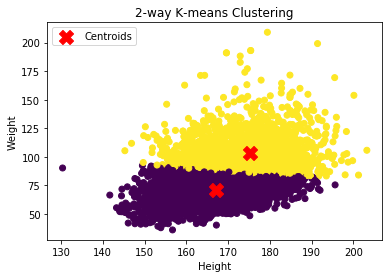

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def initialize_centroids(data, k):
    # Randomly initialize k centroids
    centroids_indices = np.random.choice(len(data), k, replace=False)
    centroids = data.iloc[centroids_indices]
    return centroids

def assign_to_clusters(data, centroids):
    # Assign each data point to the closest centroid
    if isinstance(data, pd.DataFrame):
        data_values = data.values
    else:
        data_values = data

    if isinstance(centroids, pd.DataFrame):
        centroids_values = centroids.values
    else:
        centroids_values = centroids

    distances = np.linalg.norm(data_values[:, np.newaxis, :] - centroids_values, axis=2)
    clusters = np.argmin(distances, axis=1)
    return clusters

def update_centroids(data, clusters, k):
    # Update centroids based on the mean of data points in each cluster
    centroids = np.array([data[clusters == i].mean(axis=0) for i in range(k)])
    return centroids

def compute_between_cluster_distance(data, clusters, centroids):
    # Compute the between-cluster distance objective (JD)
    n = len(data)
    JD = 0.0
    for i in range(len(centroids)):
        for j in range(i + 1, len(centroids)):
            d_ij = np.sum((centroids[i] - centroids[j]) ** 2)
            JD += (len(data[clusters == i]) * len(data[clusters == j]) / n) * (2 * d_ij / (len(data[clusters == i]) * len(data[clusters == j])) - d_ij / len(data[clusters == i]) ** 2 - d_ij / len(data[clusters == j]) ** 2)

    return JD

def two_way_kmeans(data, k=2, num_iterations=100):
    # Randomly initialize centroids
    centroids = initialize_centroids(data, k)

    for _ in range(num_iterations):
        # Assign data points to clusters based on current centroids
        clusters = assign_to_clusters(data, centroids)

        # Update centroids
        centroids = update_centroids(data, clusters, k)

    # Compute the between-cluster distance objective (JD)
    JD = compute_between_cluster_distance(data, clusters, centroids)

    return clusters, centroids, JD

# Example usage:
# Load the CSV file
file_path = 'diabetes_NHANES_1999_2004.csv'
data = pd.read_csv(file_path)

# Select two variables for 2-way k-means clustering
selected_data = data[['BMXHT', 'BMXWT']]

# Perform 2-way k-means clustering
clusters, centroids, JD = two_way_kmeans(selected_data)

# Visualize the results (scatter plot)
plt.scatter(selected_data['BMXHT'], selected_data['BMXWT'], c=clusters, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('2-way K-means Clustering')
plt.legend()
plt.show()